# Prediction using Unsupervised ML 
## Clustring with Python Scikit Learn
**Predict the optimum number of clusters and represent it visually.**

### Author: Najam Ul Saqib

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis=1, inplace=True)
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,6.1,3.0,4.6,1.4,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'] = df['Species'].map({'Iris-setosa':'0', 'Iris-versicolor': '1', 'Iris-virginica':'2'})
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: object

In [11]:
X = df.iloc[:,:4].values
y = df.iloc[:,-1].values

<AxesSubplot:>

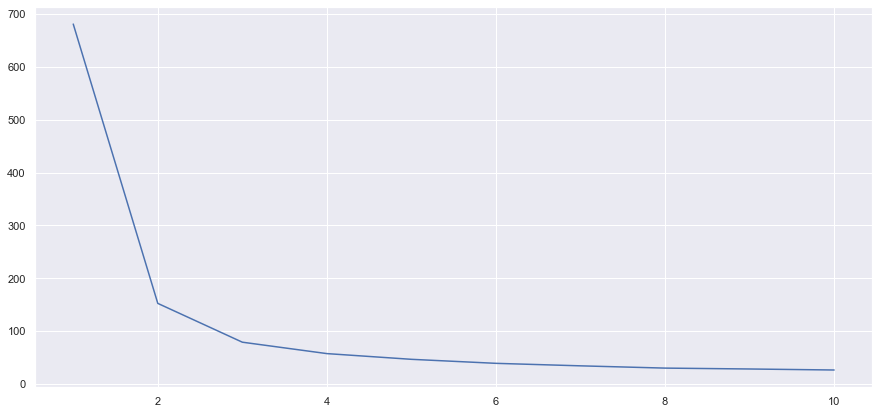

In [12]:
from sklearn.cluster import KMeans
onc = []
for i in range(1,11):
    model = KMeans(n_clusters=i, max_iter = 100, n_init = 10, random_state = 100)
    model.fit(X)
    onc.append(model.inertia_)


plt.figure(figsize=(15, 7))
sns.lineplot(range(1,11), onc)

In [13]:
model = KMeans(n_clusters=3, max_iter = 100, n_init = 10, random_state = 100)

In [14]:
# model.fit(X)

In [15]:
y_pred = model.fit_predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### pd.crosstab(y, y_pred)

<AxesSubplot:>

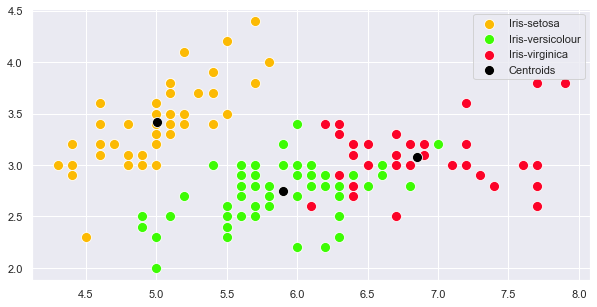

In [26]:
plt.figure(figsize=(10, 5))
# Visualising the clusters - On the first two columns
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, color = '#fcba03', label = 'Iris-setosa')
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, color = '#3dfc03', label = 'Iris-versicolour')
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, color = '#fc0328', label = 'Iris-virginica')

# Plotting the centroids of the clusters
?>/d.cf.ldcdpxmox,xzls[
    `/;1
    zxcmnvbbxdcfghnm,./?sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, color = '#000000', label = 'Centroids')